In [11]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output

In [12]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/'
repLC='LC_NS_MS/'

In [13]:
# LC alpha parameter values
LCAlpha = ['0','20','40', '60', '80', '100']
numAlphaValues = len(LCAlpha)

In [14]:
# Get all directories
sparsDat = []
manScoreDat = []
manRobotsDat = []

for i in range(numAlphaValues):
    
    tempList = []
    with open(repository + repLC + LCAlpha[i] + '/' + LCAlpha[i] + 'expSparseness.csv', 'r') as spaCsvfile:
            spaTests = csv.reader(spaCsvfile, delimiter=',', quotechar='"')
            for row in spaTests:
                tempList.append(row[:])         
    sparsDat.append(tempList)
    
    tempList = []
    with open(repository + repLC + LCAlpha[i] + '/' + LCAlpha[i] + 'expManScore.csv', 'r') as manScoreCsvfile:
            manScoreTests = csv.reader(manScoreCsvfile, delimiter=',', quotechar='"')
            for row in manScoreTests:
                tempList.append(row[:])         
    manScoreDat.append(tempList)
    
    tempList = []
    with open(repository + repLC + LCAlpha[i] + '/' + LCAlpha[i] + 'expManRobots.csv', 'r') as manRobotsCsvfile:
            manRobots = csv.reader(manRobotsCsvfile, delimiter=',', quotechar='"')
            for row in manRobots:
                tempList.append(row[:])         
    manRobotsDat.append(tempList)

In [15]:
# Convert from strin to float as array
sparsDatArray = []
manScoreDatArray = []
manRobotsDatArray = []
for pam in range(numAlphaValues):
    tempDat = [] 
    tempDat = np.array([[float(y) for y in x] for x in sparsDat[pam]]) 
    sparsDatArray.append(tempDat)
    tempDat = [] 
    tempDat = np.array([[float(y) for y in x] for x in manScoreDat[pam]]) 
    manScoreDatArray.append(tempDat)
    tempDat = [] 
    tempDat = np.array([[float(y) for y in x] for x in manRobotsDat[pam]]) 
    manRobotsDatArray.append(tempDat)

In [16]:
print(len(sparsDatArray))
print(len(sparsDatArray[0]))
print(len(sparsDatArray[0][0]))
print(manRobotsDatArray[0][:,10])


6
17
11
[  0.  10.  31.   0.   3.  33. 100.   2.  46.   8.   1.  11.   4.   0.
  10.  17.   2.]


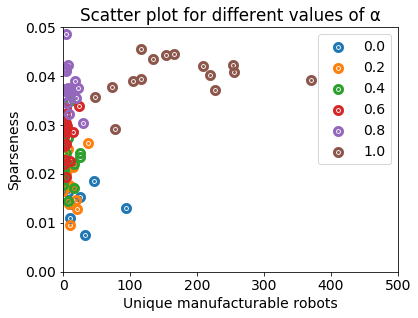

In [24]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
plt.figure(figsize=(6, 4.5))
#plt.xlabel("Proportion of unique manufacturable robots")
plt.xlabel("Unique manufacturable robots")
plt.ylabel("Sparseness")
for i in range(numAlphaValues):
    plt.scatter(manRobotsDatArray[i][:15,9],sparsDatArray[i][:15,9],marker='.',linewidths=8.0)
axes = plt.gca()
#axes.set_xlim([0,0.015])
axes.set_xlim([0,500])
axes.set_ylim([0.00,0.05])
# axes = plt.gca()
# title = experimentName + ': ' + xVariable + '-' + yVariable
plt.title('Scatter plot for different values of \u03B1')
plt.legend(["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"])
# plt.xticks(posX,rangeX)
# plt.yticks(posX,rangeX)


plt.savefig(repository+repLC+'compManRobSpa.png', dpi=200)